In [4]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

c:\Users\rajar\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X,y = mnist['data'], mnist['target']
print(X.shape, type(X))
print(y.shape)
res_X = X.to_numpy()
res_X[0]
# X.to_excel("data_set.xlsx")
y.to_excel("target.xlsx")


(70000, 784) <class 'pandas.core.frame.DataFrame'>
(70000,)


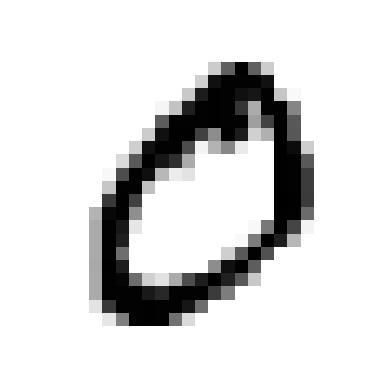

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = res_X[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


In [7]:
y = y.astype(np.uint8)
y[1]

0

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [14]:
y_train_0 = (y_train == 0)
y_test_0 = y_test == 0

y_train_0

0        False
1         True
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [15]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_0)
sgd_clf.predict([res_X[1]])


c:\Users\rajar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_0[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_0[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) 